In [1]:
cd ~/qdpy-numpyro

/mnt/disk2/samarth/qdpy-numpyro


In [2]:
%run vorontsov_qdpy/mode_lister.py --nmin 0 --nmax 0 --lmin 200 --lmax 204
%run vorontsov_qdpy/generate_synthetic_eigvals.py --load_mults 1 --knot_num 5 --rth 0.97
%run vorontsov_qdpy/precompute_ritzlavely.py

rth = 0.9
[[  0 200]
 [  0 201]
 [  0 202]
 [  0 203]
 [  0 204]]
Total multiplets: 5
rth = 0.97
rth = 0.97


nmult: 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]


0 (2045, 2045)
1 (2045, 2045)
2 (2045, 2045)
3 (2045, 2045)
4 (2045, 2045)
num elements = 10225
rth = 0.97
Generating the Ritzwoller-Lavely polynomials for ell = 204 and jmax = 5
Generating the Ritzwoller-Lavely polynomials for ell = 203 and jmax = 5
Generating the Ritzwoller-Lavely polynomials for ell = 202 and jmax = 5
Generating the Ritzwoller-Lavely polynomials for ell = 201 and jmax = 5
Generating the Ritzwoller-Lavely polynomials for ell = 200 and jmax = 5
Shape = (5, 6, 409)


In [4]:
%run vorontsov_qdpy/save_reduced_problem.py
%run vorontsov_qdpy/save_reduced_problem_M.py
%run vorontsov_qdpy/run_reduced_problem_model.py

rth = 0.97


JAX using: cpu
rth = 0.97


nmult: 100%|██████████| 5/5 [00:01<00:00,  3.01it/s]


JAX using: cpu
rth = 0.97


nmult: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]


param_coeff = (3, 4, 5, 5, 5, 417)
cind_arr = [0 1 2 3]
rth = 0.97


acoeffs model = 
 [ 0.85671159  0.02168696 -0.04940278  0.8518522   0.01050335 -0.06632126
  0.8525925   0.01233055 -0.06293354  0.85092789  0.00885238 -0.067018
  0.84975287  0.00690389 -0.06762433]
acoeffs true = 
 [ 0.4367707   0.0219629  -0.00421433  0.4367803   0.0219342  -0.00427259
  0.4367135   0.0220458  -0.00433568  0.4367955   0.022082   -0.00427108
  0.436727    0.0220257  -0.0043986 ]

 diff = 
 [ 4.19940893e-01 -2.75935964e-04 -4.51884468e-02  4.15071903e-01
 -1.14308459e-02 -6.20486717e-02  4.15879005e-01 -9.71525272e-03
 -5.85978632e-02  4.14132386e-01 -1.32296155e-02 -6.27469234e-02
  4.13025866e-01 -1.51218054e-02 -6.32257285e-02]

 diff/sigma = 
 [ 1.19245494e+04 -5.88841769e+00 -8.08200807e+02  1.17678118e+04
 -2.47630482e+02 -1.13506298e+03  1.18470884e+04 -2.16349319e+02
 -1.09791395e+03  1.15927483e+04 -2.85248279e+02 -1.15680230e+03
  1.13762113e+04 -3.24316441e+02 -1.13954521e+03]
Total time taken for 5 modes = 1.818e-02 seconds


In [5]:
zfull = param_coeff @ true_params + fixed_part
zM = param_coeff_M @ true_params + fixed_part_M
bkm = param_coeff_bkm @ true_params + fixed_part_bkm
clp = get_clp(bkm)

zfull_200 = zfull[-1]
zM_200 = zM[-1]
bkm_200 = bkm[-1]
zfull_200_flat = jnp.reshape(zfull_200, (max_nbs*max_nbs*len_mmax), order='F')
zM_200_flat = jnp.reshape(zM_200, (max_nbs*max_nbs*len_mmax), order='F')
bkm_200_flat = jnp.reshape(bkm_200, (max_nbs*max_nbs*len_mmax), order='F')

sparse_idx_200 = sparse_idx[-1]
sparseM_idx_200 = sparse_idx_M[-1]

sparse_200_flat = jnp.reshape(sparse_idx_200, (max_nbs*max_nbs*len_mmax, 2), order='F')
sparseM_200_flat = jnp.reshape(sparseM_idx_200, (max_nbs*max_nbs*len_mmax, 2), order='F')


zf_dense = sparse.BCOO((zfull_200_flat, sparse_200_flat), shape=(dim_hyper, dim_hyper)).todense()
zMf_dense = sparse.BCOO((zM_200_flat, sparseM_200_flat), shape=(dim_hyper, dim_hyper)).todense()
bkm_dense = sparse.BCOO((bkm_200_flat, sparse_200_flat), shape=(dim_hyper, dim_hyper)).todense()
zf_diag = np.diag(zf_dense)
zMf_diag = np.diag(zMf_dense)


<ipython-input-6-26c8ba9a96d6>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


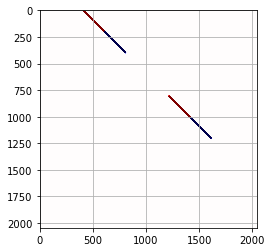

In [6]:
def plot_fullmat(mat):
    vmax = abs(mat).max()
    fig = plt.figure()
    plt.imshow(mat, cmap='seismic', vmax=vmax/100000, vmin=-vmax/100000)
    return fig

fig = plot_fullmat(bkm_dense)
fig.show()

In [ ]:
plt.figure()
for i in range(5):
    plt.plot(clp[-1, 0, :], label=i)
plt.legend()
plt.show()

In [ ]:
p_arr[:, :, 22]

In [ ]:
supmat = np.load("supmat_qdpt_200.npy").real
qdpt_diag = np.diag(supmat)
plt.figure()
plt.plot(zf_diag[:2005])
plt.plot(qdpt_diag, '--r')
plt.show()

plt.figure()
plt.semilogy(abs(zf_diag[:2005] - qdpt_diag))
plt.show()

matdiff = abs(supmat - zf_dense[:2005, :2005])
thresh = 1e-11
print(f"max diff = {matdiff.max()}")
print(f"count of diff > {thresh} = {(matdiff>thresh).sum()}")

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
axs = axs.flatten()
im1 = axs[0].imshow(zf_dense[:2005, :2005])
plt.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(supmat)
plt.colorbar(im1, ax=axs[1])

im2 = axs[2].imshow(zf_dense[:2005, :2005] - supmat)
plt.colorbar(im2, ax=axs[2])
fig.show()